# Python Assignment 1 - E-Commerce – EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## Loading DataSet

In [2]:
# Importing Dataset, specified encoding to remove errors  
df = pd.read_csv('C:/Users/akshay/Desktop/Board Infinity/Python/Python Assignment 1/Ecommerce.csv',encoding = 'ISO-8859-1')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1. Perform Basic EDA

There are only two Numeric variables Quantity, UnitPrice and CustomerID

### a. Boxplot – All Numeric Variables

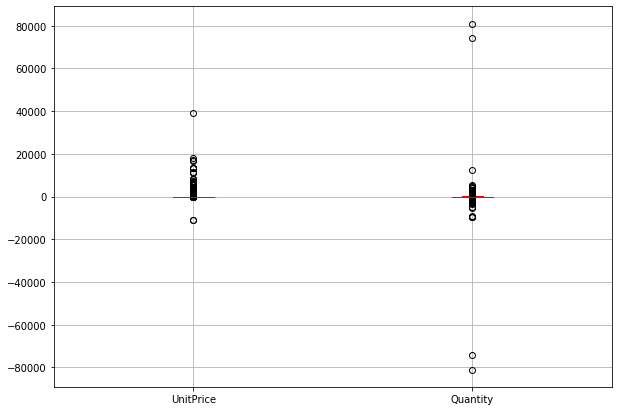

In [7]:
plt.subplots(figsize=(10,7))
df.boxplot(['UnitPrice','Quantity'], grid=True, color='red')
plt.show()

### b. Histogram – All Numeric Variables

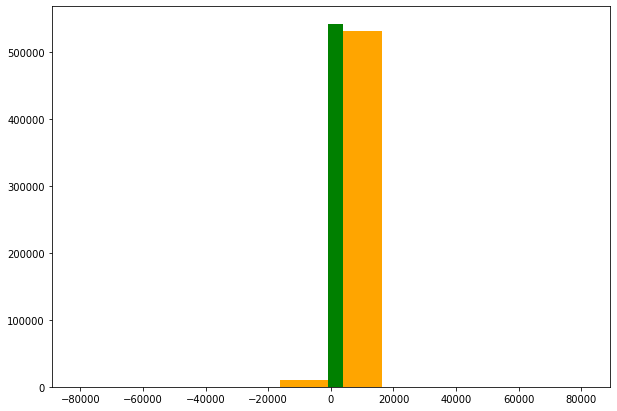

In [8]:
plt.subplots(figsize=(10,7))
plt.hist(df['Quantity'],color='orange')
plt.hist(df['UnitPrice'],color='green')
plt.show()

### c. Distribution Plot – All Numeric Variables

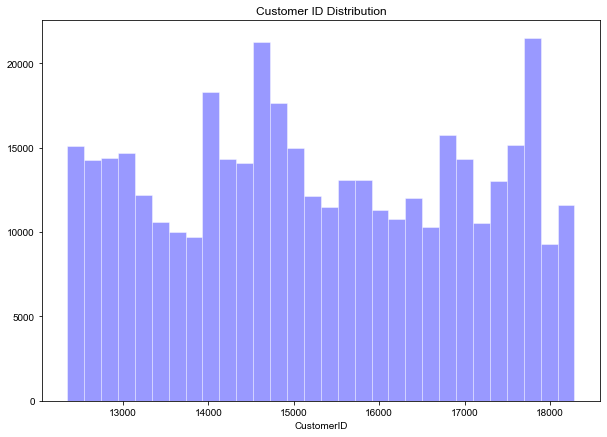

In [9]:
plt.subplots(figsize=(10,7))

sns.set_style('whitegrid')
sns.distplot(df['CustomerID'],kde=False, color ='blue' , bins =30)
plt.title('Customer ID Distribution')
plt.show()

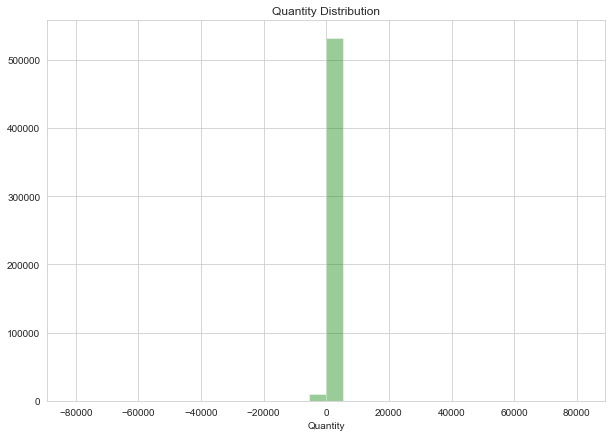

In [10]:
plt.subplots(figsize=(10,7))

sns.set_style('whitegrid')
sns.distplot(df['Quantity'],kde=False, color ='green' , bins =30)
plt.title('Quantity Distribution')
plt.show()

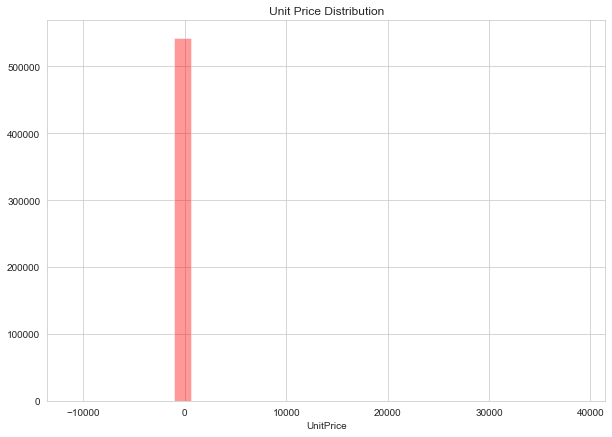

In [11]:
plt.subplots(figsize=(10,7))

sns.set_style('whitegrid')
sns.distplot(df['UnitPrice'],kde=False, color ='red' , bins =30)
plt.title('Unit Price Distribution')
plt.show()

### d. Aggregation for all numerical Columns

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# our data we have some invoices with 0 unit price, so I have calculated aggregation again excluding 0 unit price/\. 
df = df[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,406789.000000
mean,9.845904,4.673648,15287.795830
std,215.412652,94.614722,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### e. Unique Values across all columns

In [14]:
# used this command to find unique values for all columns in dataset
df.nunique()

InvoiceNo      23796
StockCode       3938
Description     4042
Quantity         510
InvoiceDate    21802
UnitPrice       1628
CustomerID      4371
Country           38
dtype: int64

### f. Duplicate values across all columns

In [15]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 539392, dtype: bool

In [16]:
## Count of all duplicate values across columns
print("Duplicate Records across all columns: ",df.duplicated().sum(),'\n','\n')


print("Duplicate Values in column InvoiceNo: ",df['InvoiceNo'].duplicated().sum())
print("Duplicate Values in column StockCode: ",df['StockCode'].duplicated().sum())
print("Duplicate Values in column Description: ",df['Description'].duplicated().sum())
print("Duplicate Values in column Quantity: ",df['Quantity'].duplicated().sum())
print("Duplicate Values in column InvoiceDate: ",df['InvoiceDate'].duplicated().sum())
print("Duplicate Values in column UnitPrice: ",df['UnitPrice'].duplicated().sum())
print("Duplicate Values in column CustomerID: ",df['CustomerID'].duplicated().sum())
print("Duplicate Values in column Country: ",df['Country'].duplicated().sum())

Duplicate Records across all columns:  5263 
 

Duplicate Values in column InvoiceNo:  515596
Duplicate Values in column StockCode:  535454
Duplicate Values in column Description:  535350
Duplicate Values in column Quantity:  538882
Duplicate Values in column InvoiceDate:  517590
Duplicate Values in column UnitPrice:  537764
Duplicate Values in column CustomerID:  535020
Duplicate Values in column Country:  539354


### g. Correlation – Heatmap - All Numeric Variables

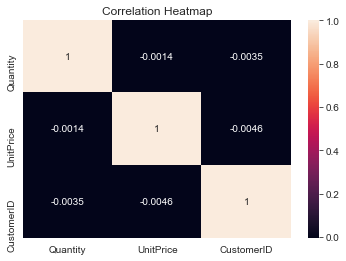

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

### h. Regression Plot - All Numeric Variables

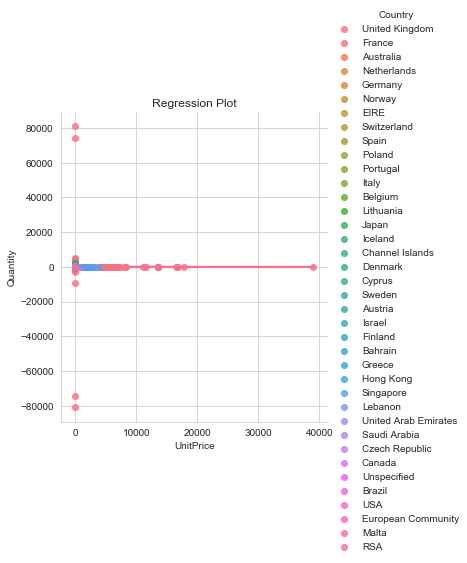

In [18]:
sns.lmplot(x='UnitPrice', y='Quantity', data=df, hue='Country')
plt.title('Regression Plot')
plt.show()

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

### j. Pair plot - All Numeric Variables

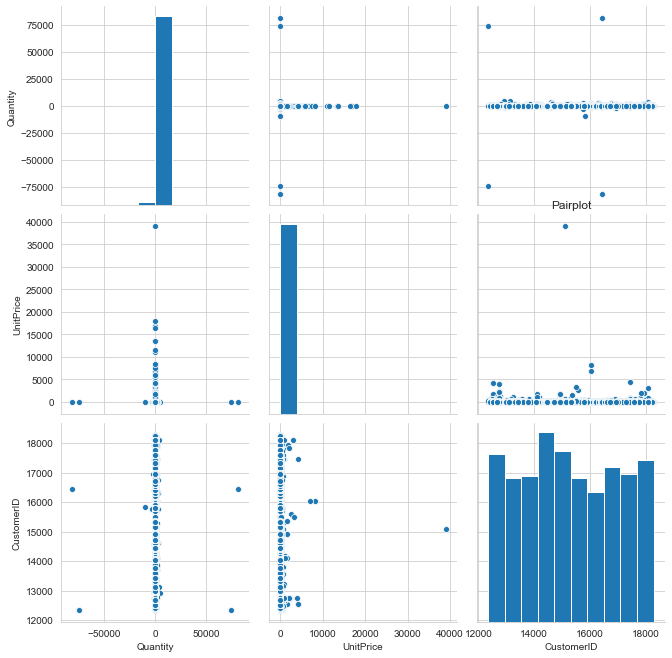

In [19]:
sns.pairplot(df, size=3, palette='dark')
plt.title('Pairplot')
plt.show()

### k. Line chart to show the trend of data - All Numeric/Date Variables

### l. Plot the skewness - All Numeric Variables

In [20]:
df.skew(axis = 0, skipna = True)

Quantity       -0.120045
UnitPrice     206.344636
CustomerID      0.029789
dtype: float64

In [21]:
df.skew(axis = 1, skipna = True)

0         1.732051
1         1.732051
2         1.732050
3         1.732051
4         1.732051
            ...   
541904    1.732046
541905    1.732050
541906    1.732051
541907    1.732051
541908    1.732051
Length: 539392, dtype: float64

In [22]:
from scipy.stats import skew   
import pylab as p


Skewness for data :  1.1108237139164436


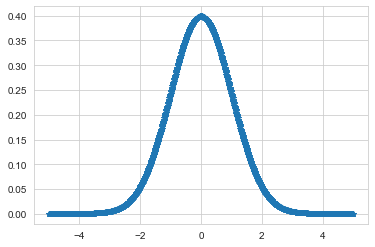

In [23]:
x1 = np.linspace( -5, 5, 1000 ) 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
  
p.plot(x1, y1, '*') 
  
print( '\nSkewness for data : ', skew(y1))


Skewness for data :  1.917677776148478


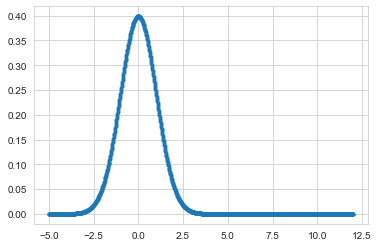

In [24]:
x1 = np.linspace( -5, 12, 1000 ) 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
  
p.plot(x1, y1, '.') 
  
print( '\nSkewness for data : ', skew(y1))

## 2. Check for missing values in all columns and replace them with the appropriate metric
(Mean/Median/Mode)

In [25]:
 # check missing values for each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
dtype: int64

#### we can not replace missing values in since the values assigned to those variables are unique.

In [26]:
# df without missing values
df = df.dropna()

In [27]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## 3. Remove duplicate rows

In [29]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [30]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 406789, dtype: bool

In [31]:
## Count of all duplicate values across columns
print("Duplicate values across all columns: ",df.duplicated().sum())

Duplicate values across all columns:  5225


In [32]:
df=df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## 4. Remove rows which have negative values in Quantity column

In [33]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [34]:
df = df[df.Quantity > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## 5. Add the columns - Month, Day and Hour for the invoice

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [36]:
# we need to change the format of InvoiceDate to Date Time Format
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [37]:
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.time

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00


## 6. How many orders made by the customers?

In [39]:
df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


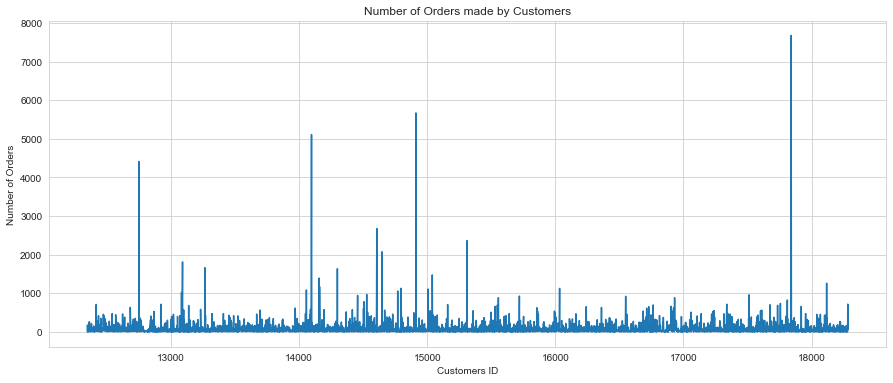

In [40]:
Orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(Orders.CustomerID, Orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders made by Customers')
plt.show()

## 7. TOP 5 customers with higher number of orders

In [41]:
print('The TOP 5 Customers with Higher number number of orders...')
Orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 Customers with Higher number number of orders...


,CustomerID,Country,InvoiceNo
4018,17841.0,United Kingdom,7676
1887,14911.0,EIRE,5670
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4412
1669,14606.0,United Kingdom,2677


##  8. How much money spent by the customers?

In [42]:
# Since we dont know the amount spent by the customer we have to calculate it
df['Money_Spent'] = df['Quantity'] * df['UnitPrice']

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Money_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00,20.34


In [44]:
amount_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Money_Spent'].sum()
amount_spent.head()

,CustomerID,Country,Money_Spent
0,12346.0,United Kingdom,77183.60
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1797.24
3,12349.0,Italy,1757.55
4,12350.0,Norway,334.40


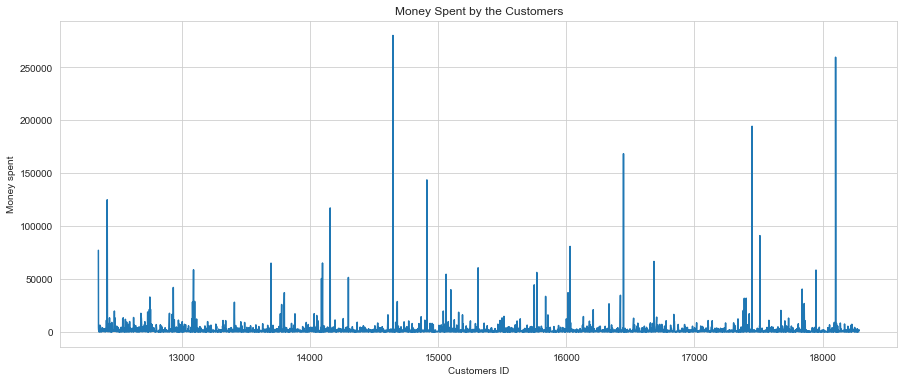

In [45]:
plt.subplots(figsize=(15,6))
plt.plot(amount_spent.CustomerID, amount_spent.Money_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent')
plt.title('Money Spent by the Customers')
plt.show()

## 9. TOP 5 customers with highest money spent

In [46]:
print('The TOP 5 customers with highest money spent...')
amount_spent.sort_values(by='Money_Spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,Money_Spent
1697,14646.0,Netherlands,280206.02
4209,18102.0,United Kingdom,259657.30
3736,17450.0,United Kingdom,194390.79
3016,16446.0,United Kingdom,168472.50
1887,14911.0,EIRE,143711.17


## 10. How many orders per month?

In [47]:
df.groupby('InvoiceNo')['Month'].unique().value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[2]      997
[3]     1321
[4]     1149
[5]     1555
[6]     1393
[7]     1331
[8]     1280
[9]     1755
[10]    1929
[11]    2657
[12]    2178
Name: Month, dtype: int64

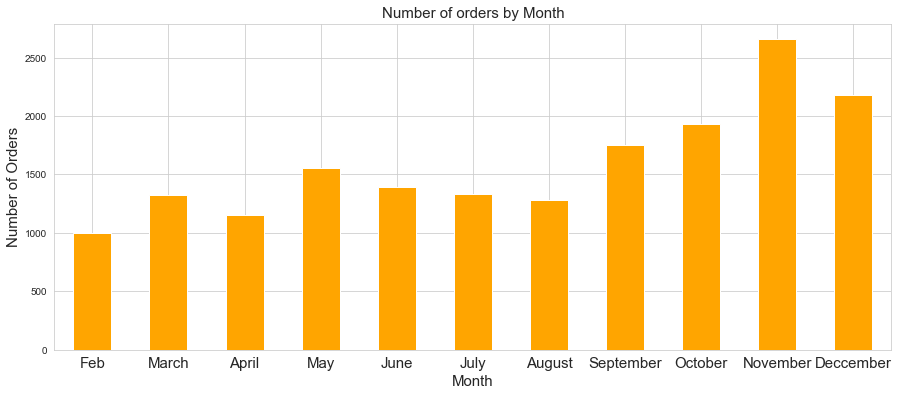

In [48]:
ax = df.groupby('InvoiceNo')['Month'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color='orange',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders by Month',fontsize=15)
ax.set_xticklabels(('Feb','March','April','May','June','July','August','September','October','November','Deccember'), rotation='horizontal', fontsize=15)
plt.show()

## 11. How many orders per day?

In [49]:
df.groupby('InvoiceNo')['Day'].unique().value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]     709
[2]     613
[3]     520
[4]     629
[5]     723
[6]     801
[7]     773
[8]     771
[9]     660
[10]    626
[11]    629
[12]    507
[13]    596
[14]    670
[15]    553
[16]    650
[17]    694
[18]    572
[19]    519
[20]    661
[21]    594
[22]    564
[23]    579
[24]    583
[25]    561
[26]    446
[27]    545
[28]    624
[29]    404
[30]    443
Name: Day, dtype: int64

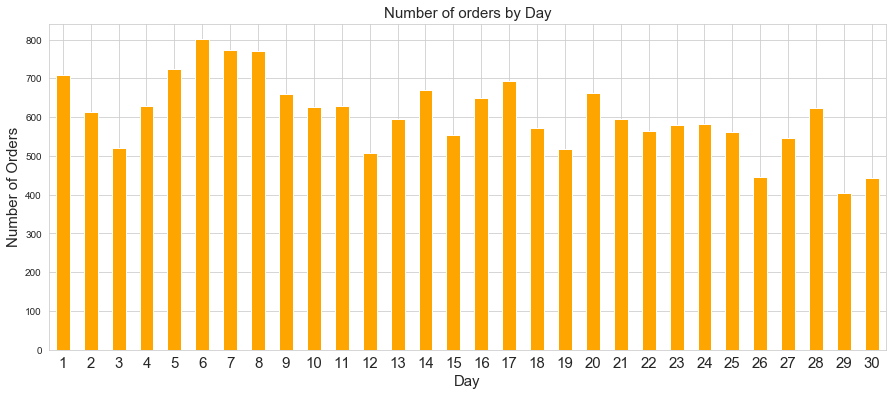

In [50]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color='orange',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders by Day',fontsize=15)
ax.set_xticklabels((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30), rotation='horizontal', fontsize=15)
plt.show()

## 12. How many orders per hour?

In [51]:
# The Hour time is in minutes and seconds as ewell, hence we convert it to hour only
df['Exact Hour'] = pd.DatetimeIndex(df['InvoiceDate']).hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Money_Spent,Exact Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,08:26:00,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,08:26:00,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,08:26:00,20.34,8


In [52]:
df.groupby('InvoiceNo')['Exact Hour'].unique().value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[6]        1
[7]       29
[8]      555
[9]     1393
[10]    2226
[11]    2276
[12]    3129
[13]    2636
[14]    2274
[15]    2037
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: Exact Hour, dtype: int64

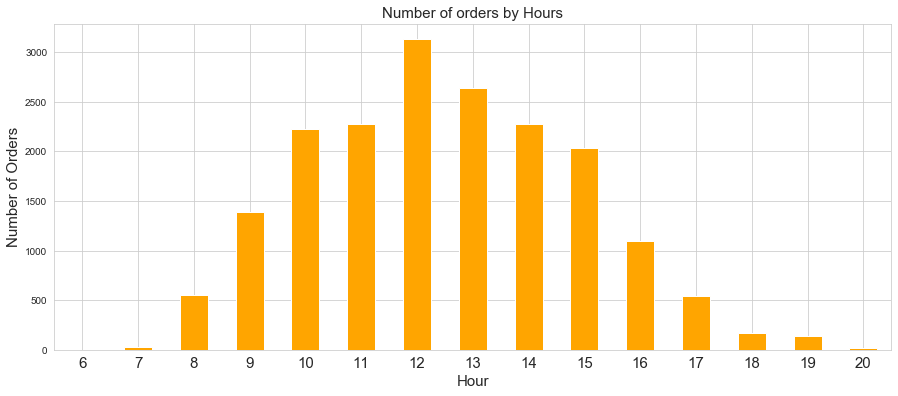

In [53]:
ax = df.groupby('InvoiceNo')['Exact Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color='orange',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders by Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

## 13. How many orders for each country?

In [54]:
country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

In [55]:
country_orders

Country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         57
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                241
Israel                     245
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     450
Cyprus                     603
Finland                    685
Channel Islands            747
Italy                      758
Norway                    1071
Australia                 1181
Portugal                  1453
Switzerland               1841
Belgium                   2031
Netherlands               2359


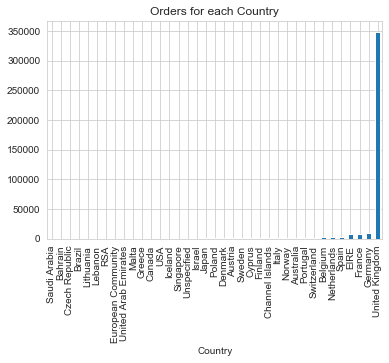

In [56]:
country_orders.plot.bar()
plt.title('Orders for each Country')
plt.show()

## 14. Orders trend across months

In [57]:
orders_month = df.groupby('Month')['InvoiceNo'].count().sort_values().
orders_month

Month
2     19706
1     20988
4     22433
7     26580
8     26790
3     26870
6     26926
5     28073
9     39669
12    42696
10    48793
11    63168
Name: InvoiceNo, dtype: int64

In [58]:
def show_plot(orders_month,
             figsize=(15,15),
             color='blue',
             linestyle='-',
             xlabel='Month',
             ylabel='Orders',
             label='Orders Trend'):
        plt.figure(figsize=figsize)
        plt.plot(orders_month.index,orders_month,color=color,label=label)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc=2)

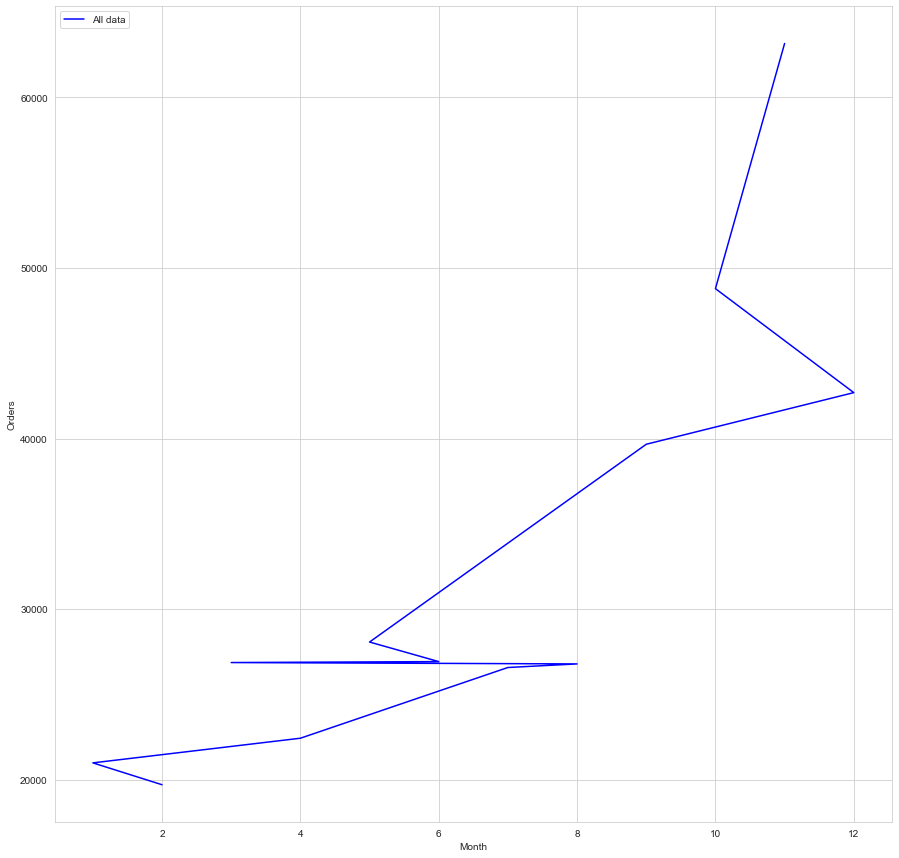

In [59]:
show_plot(orders_month,label='All data')

## 15. How much money spent by each country?

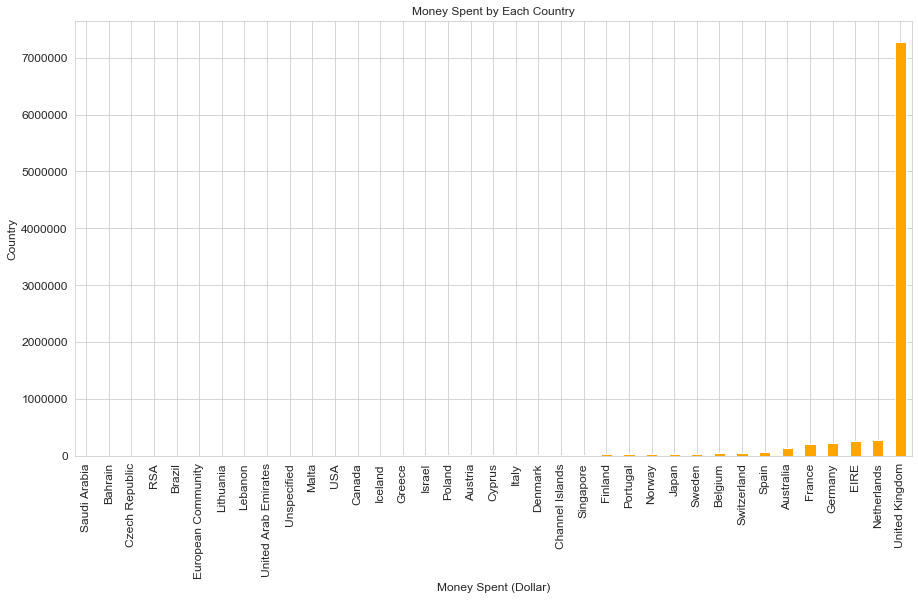

In [60]:
country_amount_spent = df.groupby('Country')['Money_Spent'].sum().sort_values()

plt.subplots(figsize=(15,8))
country_amount_spent.plot(kind='bar', fontsize=12, color='Orange')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by Each Country', fontsize=12)
plt.show()